In [1]:
# Imports
# Python class
from knn import KNN

# sklearn model
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Preprocessing/ Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans # determine optimal k
from sklearn.metrics import accuracy_score

### Load Data

In [2]:
iris = load_iris()

### Exploration

In [3]:
# Checking the dataset
iris.data
print(iris.data.shape)

(150, 4)


In [4]:
# Checking features
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# Separate into target and features
#Scale features
X = scale(iris.data)

In [6]:
X.shape

(150, 4)

In [7]:
y = iris.target # classes

### Choosing optimal k (nearest neighbors)

In [8]:
k = np.sqrt(X.shape[0])

In [9]:
print(k)

12.24744871391589


I will use 13 as my k

### Split into train and test

In [10]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) # for reproducible results

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

### Sklearn - KNN Classifier

In [12]:
#1. Choose K based on results from elbow method
clf = KNeighborsClassifier(n_neighbors=13)

In [13]:
#2.  Fit
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [14]:
#3. Prediction
predict = clf.predict(X_test)
print("******SKLEARN******")
print(f'Prediction:\n {predict}')

******SKLEARN******
Prediction:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [15]:
#4. Accuracy Score
print(f"Scikit-learn KNN classifier accuracy: {accuracy_score(y_test, predict)}")

Scikit-learn KNN classifier accuracy: 1.0


### KNN from Scratch in Python 

In [16]:
#1. Instantiate model
np_clf = KNN(k=13)

In [17]:
#2. Fit
np_clf.fit(X_train, y_train)

In [18]:
#3. Prediction
predict = np_clf.predict(X_test)
print("******PYTHON MODEL******")
print("Prediction", predict)

******PYTHON MODEL******
Prediction [1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0]


In [19]:
#4. Accuracy Score
print(f"KNN model accuracy: {accuracy_score(y_test, predict)}")

KNN model accuracy: 1.0


## Checking Prediction Power

In [20]:
# 0 = setosa, 1 = versicolor, 2 = viriginca
classes = {0:'setosa', 1:'versicolor', 2:'virginica'}

In [21]:
# Making prediction on some new data
# Random observation

X_new = np.array([
    [3, 4, 5, 2],
    [5, 4, 2, 2]])


In [22]:
# Sklearn
y_predict_s = clf.predict(X_new)

In [23]:
print(f"Vector 1:{classes[y_predict_s[0]]}")
print(f"Vector 2:{classes[y_predict_s[1]]}")


Vector 1:virginica
Vector 2:virginica


In [24]:
# Python
y_predict_p = np_clf.predict(X_new)

In [25]:
print(f"Vector 1:{classes[y_predict_p[0]]}")
print(f"Vector 2:{classes[y_predict_p[1]]}")

Vector 1:virginica
Vector 2:virginica


### KNN with 3 neighbors

In [26]:
from matplotlib.colors import ListedColormap

In [27]:
# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

X = iris.data[:, :2]  # we only take the first two features. We could
                    # avoid this ugly slicing by using a two-dim dataset
y = iris.target

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

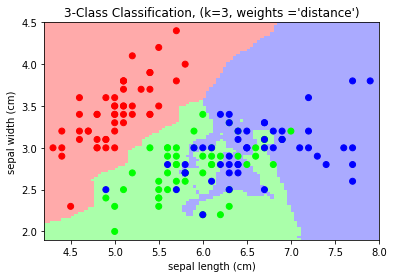

In [28]:
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.title(f"3-Class Classification, (k=3, weights ='distance')")
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')
plt.show()

## Checking Choice for K

In [29]:
k_range = range(1, 26)
scores = {}
scores_list = []

In [32]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = accuracy_score(y_test, y_pred)
    scores_list.append(accuracy_score(y_test, y_pred))

In [33]:
%matplotlib inline

Text(0, 0.5, 'Testing Accuracy')

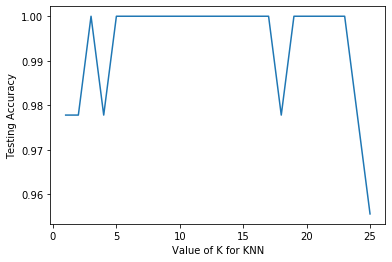

In [34]:
# plot the relationship between K and the testing accuracy
plt.plot(k_range, scores_list)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")